# ASSIGNMENT -**2**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
t=pd.read_csv("drug200.csv")
print(t)

     Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]


In [ ]:
t.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
t.tail(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [ ]:
k=len(t)
print(k)

200


***PREPROCESSING***

([<matplotlib.patches.Wedge object at 0x7fadaae9b610>, <matplotlib.patches.Wedge object at 0x7fadaae9b550>], [Text(-0.05181704640055811, 1.09877886478687, 'High'), Text(0.05181704640055798, -1.09877886478687, 'Normal')], [Text(-0.02826384349121351, 0.5993339262473836, '51%'), Text(0.028263843491213442, -0.5993339262473836, '49%')])


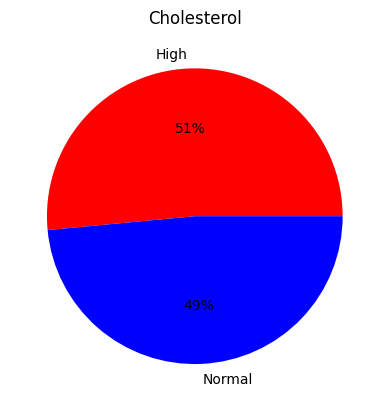

In [ ]:
pre=plt.pie(t.Cholesterol.value_counts(),labels=['High','Normal'],colors=['red','blue'],autopct="%.0f%%")
# o=pre.set_title("Cholesterol")
plt.title("Cholesterol")
print(pre)
# print(o)

([<matplotlib.patches.Wedge object at 0x7fadaad06560>, <matplotlib.patches.Wedge object at 0x7fadaad064a0>, <matplotlib.patches.Wedge object at 0x7fadaad06c80>], [Text(0.3888223589862547, 1.0289884222635182, 'High'), Text(-1.0563230795297933, -0.3068901296110612, 'low'), Text(0.660462119378317, -0.8796532208014144, 'Normal')])


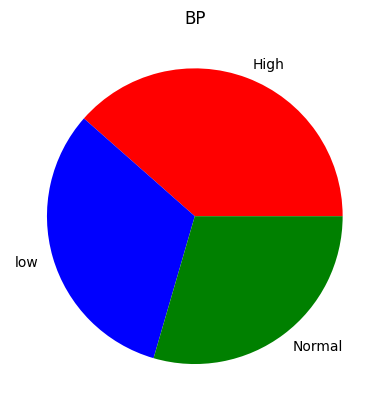

In [ ]:
b=plt.pie(t.BP.value_counts(),labels=['High','low','Normal'],colors=['red','blue','green'])
plt.title("BP")
print(b)

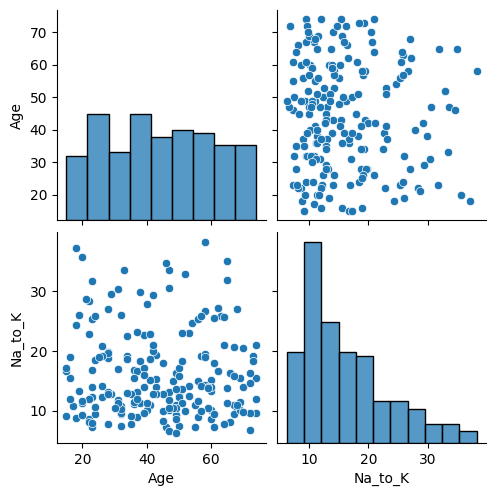

In [ ]:
sns.pairplot(t)

<ipython-input-61-86abcbba3a0d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(t.corr())


<Axes: >

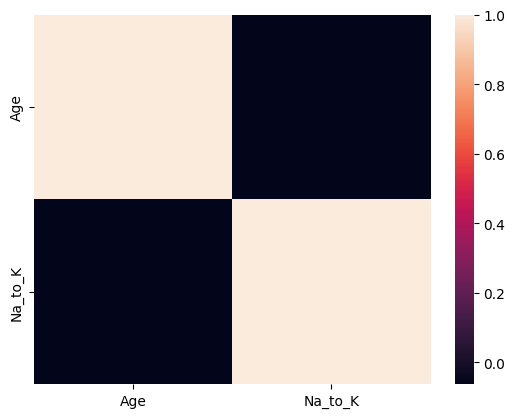

In [ ]:
sns.heatmap(t.corr())

In [ ]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
t.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

SPLITTING DEPENDENT AND INDEPENDENT VALUES

ENCODER CHANGING OBJECTS TO NUMERICALS

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
t['Sex']=le.fit_transform(t['Sex'])

t['BP']=le.fit_transform(t['BP'])

t['Cholesterol']=le.fit_transform(t['Cholesterol'])
t

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


USING  CHANGING VALUES

In [ ]:
x=t.iloc[:,0:5]
print(x)

     Age  Sex  BP  Cholesterol  Na_to_K
0     23    0   0            0   25.355
1     47    1   1            0   13.093
2     47    1   1            0   10.114
3     28    0   2            0    7.798
4     61    0   1            0   18.043
..   ...  ...  ..          ...      ...
195   56    0   1            0   11.567
196   16    1   1            0   12.006
197   52    1   2            0    9.894
198   23    1   2            1   14.020
199   40    0   1            1   11.349

[200 rows x 5 columns]


In [ ]:
y=t.iloc[:,5:]
print(y)

      Drug
0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
..     ...
195  drugC
196  drugC
197  drugX
198  drugX
199  drugX

[200 rows x 1 columns]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=12)
xtrain

,Age,Sex,BP,Cholesterol,Na_to_K
77,26,0,0,1,19.161
47,68,1,1,0,10.291
94,56,1,1,0,15.015
14,50,0,2,0,12.703
41,58,0,0,1,14.239
...,...,...,...,...,...
3,28,0,2,0,7.798
130,70,0,2,0,20.489
134,42,0,0,0,21.036
155,49,1,1,0,10.537


In [ ]:
les=LabelEncoder()

ytrain=les.fit_transform(ytrain)
ytest=les.transform(ytest)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


PROBLEM -2 BUILDING ANN MODEL

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

CLASSIFICATION

In [ ]:
#intialize the sequence model
cla_model=Sequential()
cla_model.add(Dense(5,activation='relu'))
cla_model.add(Dense(64,activation='relu'))
cla_model.add(Dense(32,activation='relu'))
cla_model.add(Dense(24,activation='relu'))
#adding output layer
cla_model.add(Dense(5,activation='softmax'))

In [ ]:
cla_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

TRAINING THE MODE

In [ ]:
cla_model.fit(xtrain,ytrain,batch_size=4,epochs=10,validation_data=(xtest,ytest))

Epoch 1/10
40/40 [==============================] - 2s 10ms/step - loss: 1.4496 - accuracy: 0.4437 - val_loss: 1.3522 - val_accuracy: 0.4000
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 1.1883 - accuracy: 0.4875 - val_loss: 1.0583 - val_accuracy: 0.6250
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 1.1002 - accuracy: 0.5125 - val_loss: 1.0365 - val_accuracy: 0.5750
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 1.0737 - accuracy: 0.5375 - val_loss: 0.9644 - val_accuracy: 0.6750
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 1.0498 - accuracy: 0.5437 - val_loss: 0.9529 - val_accuracy: 0.6500
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 1.0476 - accuracy: 0.5375 - val_loss: 0.9782 - val_accuracy: 0.6250
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 1.0257 - accuracy: 0.5125 - val_loss: 0.9906 - val_accuracy: 0.6250
Epoch 8/10
40/40 [=

In [ ]:
ypred = cla_model.predict([[2,4,5,1,2]])
print(ypred)
ypred=np.argmax(ypred)
output=['DrugY','drugX','drugA','drugC','drugB']
output[ypred]

1/1 [==============================] - 0s 180ms/step
[[0.710338   0.07187686 0.01137713 0.03890806 0.1674999 ]]


'DrugY'